In [17]:
from sklearn.datasets import fetch_openml
import numpy as np


In [ ]:
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

In [6]:
X,y = mnist["data"], mnist["target"]
print(f"X: {X.shape} Y: {y.shape}")

X: (70000, 784) Y: (70000,)


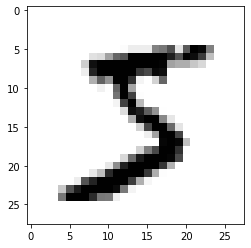

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

sample_digit = X.iloc[0].to_numpy()
sample_digit_image = sample_digit.reshape(28,28)
plt.imshow(sample_digit_image, cmap="binary")
plt.show()

In [18]:
#y is alpha but mnist784 is just numbers - need to convert to numeric
print(y[0])
y=y.astype(np.uint8)
print(y[0])

5
5


In [21]:
#mnist784 is already in random order, so just take the final 10k out of 70 k as test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [23]:
#binary classifier for "5"s
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [25]:
sgd_clf.predict([sample_digit])

array([ True])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [28]:
cross_val_score(sgd_clf, X_train,y_train_5,cv=3,scoring="recall")

array([0.47039292, 0.63973437, 0.84338683])

In [30]:
#Getting confusion matrix using cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5,y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

* 1891 false positives
* 687 false negatives

* Precision measures % of cases *classified* as TRUE that *are* true
* Recall: measures % of TRUE cases that are *classified* as True

In [31]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision score: {precision_score(y_train_5,y_train_pred)}")
print(f"Recall score: {recall_score(y_train_5,y_train_pred)}")

Precision score: 0.8370879772350012
Recall score: 0.6511713705958311


* <b>F<sub>1</sub></b> score favours classifiers that have similar precision and recall
* This isn't always desirable (e.g. medical tests)

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

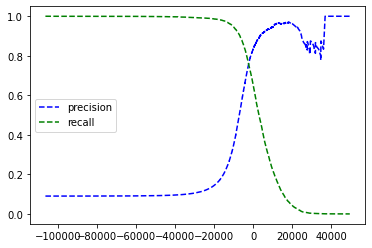

In [42]:
#Precision recall curve - is this the same as AUROC???
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1], 'b--', label = "precision")
    plt.plot(thresholds,recalls[:-1], 'g--', label = "recall")
    plt.legend(loc="center left")
    plt.show()

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

* Recall always reduces as the threshold is raised
* Precision *can decrease* as the threshold is raised (true positives are removed)

In [43]:
#Aiming for 90% accuracy
threshold_90_precision=thresholds[np.argmax(precisions>=0.9)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(f"Precision: {precision_score(y_train_5,y_train_pred_90)}")
print(f"Recall: {recall_score(y_train_5,y_train_pred_90)}")


Precision: 0.9000345901072293
Recall: 0.4799852425751706


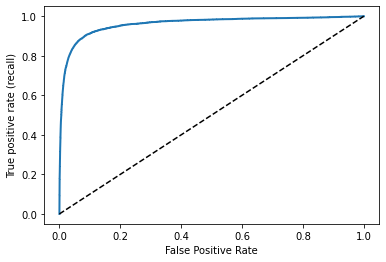

In [45]:
#ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True positive rate (recall)")
    plt.show()

plot_roc_curve(fpr, tpr)


In [46]:
#AUROC - perfect classifier will have AUROC of 1, random will have AUROC 0.5
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616